Henry Tamekloe



In [29]:
import io
import sqlite3
import pandas as pd

**DOWNLOADING THE DATABASE**

In [30]:
!wget --quiet -P /tmp/ https://raw.githubusercontent.com/henrany/BCC/master/Database%20System/tp1/despesas.sql

**CONNECTING TO THE SQLITE3 SERVER**

In [31]:
conn = sqlite3.connect('/tmp/despesas.db')
cursor = conn.cursor()

In [32]:
f = io.open('/tmp/despesas.sql', 'r', encoding='utf-8')
sql = f.read()
try:
    cursor.executescript(sql)
except:
  pass

**THE RELATIONAL SCHEMA OF THE DATA**

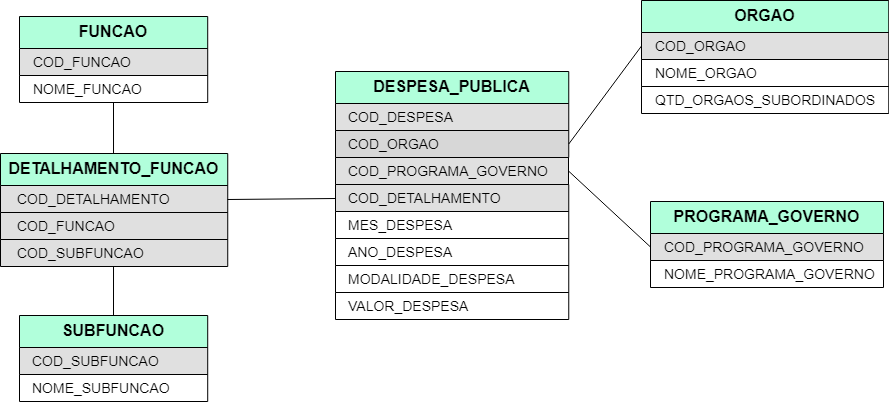


**SECTION 4.1 QUESTIONS**

**CONSULTATIONS**

**6. Liste todos os nomes de funcoes e subfuncoes das despesas publicas do terceiro trimestre
de 2018 e seus respectivos valores totais, apenas para o programa MAIS MEDICOS.**

In [33]:
query = """
SELECT F.NOME_FUNCAO, S.NOME_SUBFUNCAO, SUM(P.VALOR_DESPESA) AS VALOR
FROM FUNCAO AS F NATURAL JOIN DETALHAMENTO_FUNCAO AS D
NATURAL JOIN SUBFUNCAO AS S NATURAL JOIN DESPESA_PUBLICA AS P
WHERE P.MES_DESPESA > 6 AND P.MES_DESPESA  < 10 AND P.ANO_DESPESA = 2018
  AND P.COD_PROGRAMA_GOVERNO IN(
    SELECT G.COD_PROGRAMA_GOVERNO
    FROM PROGRAMA_GOVERNO AS G
    WHERE G.NOME_PROGRAMA_GOVERNO = 'MAIS MEDICOS'
)
GROUP BY F.COD_FUNCAO, S.COD_SUBFUNCAO
"""

In [34]:
df = pd.read_sql_query(query,conn)
df

,NOME_FUNCAO,NOME_SUBFUNCAO,VALOR
0,Defesa nacional,Administração geral,0
1,Saúde,Atenção básica,11000
2,Educação,Assistência hospitalar e ambulatorial,0
3,Educação,Ensino superior,2400


**1.Liste todos os codigos e nomes de subfuncoes da funcao que possui o maior numero de
subfuncoes.**

In [35]:
query = """
SELECT S.COD_SUBFUNCAO, S.NOME_SUBFUNCAO
FROM DETALHAMENTO_FUNCAO AS D NATURAL JOIN SUBFUNCAO AS S
NATURAL JOIN (
  SELECT F.COD_FUNCAO
  FROM DETALHAMENTO_FUNCAO AS D NATURAL JOIN FUNCAO AS F
  GROUP BY F.COD_FUNCAO
  ORDER BY COUNT(*) DESC
  LIMIT 1
)
"""

In [36]:
df = pd.read_sql_query(query,conn)
df

,COD_SUBFUNCAO,NOME_SUBFUNCAO
0,125,Normatização e fiscalização
1,126,Tecnologia da informação
2,131,Comunicação social
3,244,Assistência comunitária
4,306,Alimentação e nutrição
5,365,Educação infantil
6,511,Saneamento básico rural


**2.Liste o valor total de despesas publicas por funcao (nome) e subfuncao (nome), apenas
nos casos em que esse valor total excedeu 200 mil reais.**

In [37]:
query = """
SELECT F.NOME_FUNCAO, S.NOME_SUBFUNCAO, SUM(P.VALOR_DESPESA) AS VALOR
FROM DETALHAMENTO_FUNCAO AS D 
NATURAL JOIN DESPESA_PUBLICA AS P
NATURAL JOIN FUNCAO AS F 
NATURAL JOIN SUBFUNCAO AS S
GROUP BY F.COD_FUNCAO, S.COD_SUBFUNCAO
HAVING VALOR > 200000
"""

In [38]:
df = pd.read_sql_query(query,conn)
df

,NOME_FUNCAO,NOME_SUBFUNCAO,VALOR
0,Assistência social,Assistência comunitária,227883.77
1,Educação,Educação básica,334262.06


**3. Liste todos os nomes dos orgaos e o valor das despesas totais no ano de 2018 para os
mesmos, ordenando de forma decrescente pelo valor.**

In [39]:
query = """
SELECT O.NOME_ORGAO, SUM(P.VALOR_DESPESA) VALOR
FROM DESPESA_PUBLICA AS P NATURAL JOIN ORGAO AS O
WHERE P.ANO_DESPESA = 2018
GROUP BY O.COD_ORGAO
ORDER BY VALOR DESC
"""

In [40]:
df = pd.read_sql_query(query,conn)
df

,NOME_ORGAO,VALOR
0,Ministério da Defesa,353376.70
1,Ministério do Desenvolvimento Social,278586.35
2,"Ministério da Agricultura, Pecuária e Abastec",90836.51
3,Ministério da Educação,64007.82
4,Ministério da Saúde,50971.19
5,Presidência da República,0.00
6,"Ministério da Ciência, Tecnologia, Inovações",0.00
7,Ministério da Fazenda,0.00
8,Ministério da Justiça e Segurança Pública,0.00
9,Ministério das Relações Exteriores,0.00


**5. Liste o codigo e nome dos programas de governo que possuiram os 3 maiores valores
de despesas totais na funcao de educacao durante o ano de 2018.**

In [41]:
query = """
SELECT G.COD_PROGRAMA_GOVERNO, G.NOME_PROGRAMA_GOVERNO
FROM PROGRAMA_GOVERNO AS G NATURAL JOIN DESPESA_PUBLICA AS P
NATURAL JOIN DETALHAMENTO_FUNCAO AS D 
NATURAL JOIN (
  SELECT F.COD_FUNCAO
  FROM FUNCAO AS F
  WHERE F.NOME_FUNCAO = 'Educação'
)
WHERE P.ANO_DESPESA = 2018
GROUP BY P.COD_PROGRAMA_GOVERNO
ORDER BY SUM(P.VALOR_DESPESA) DESC
LIMIT 3
"""

In [42]:
df = pd.read_sql_query(query,conn)
df

,COD_PROGRAMA_GOVERNO,NOME_PROGRAMA_GOVERNO
0,11,ENEM
1,14,PRONATEC
2,35,MAIS MEDICOS


**7. Liste os orgaos governamentais e a quantidade de programas de governo distintos envolvidos
nas despesas publicas desses orgaos. Nesta consulta, desconsidere valores de
despesa negativos ou iguais a zero no periodo.**

In [43]:
query = """
SELECT O.NOME_ORGAO, O.COD_ORGAO, COUNT(*) AS QUANTITY
FROM DESPESA_PUBLICA AS P NATURAL JOIN ORGAO AS O
NATURAL JOIN PROGRAMA_GOVERNO
WHERE P.VALOR_DESPESA > 0
GROUP BY O.COD_ORGAO
"""

In [44]:
df = pd.read_sql_query(query,conn)
df

,NOME_ORGAO,COD_ORGAO,QUANTITY
0,"Ministério da Agricultura, Pecuária e Abastec",22000,4
1,Ministério da Educação,26000,10
2,Ministério da Saúde,36000,3
3,Ministério da Defesa,52000,2
4,Ministério do Desenvolvimento Social,55000,2


**SECTION 4.2**

**TRANSLATION OF RELATIONAL ALGEBRA COMMANDS**

**12.(project)NOME FUNCAO, NOME SUBFUNCAO(FUNCAO (join) DETALHAMENTO FUNCAO ./ SUBFUNCAO)**

In [45]:
query = """
SELECT F.NOME_FUNCAO, S.NOME_SUBFUNCAO
FROM FUNCAO AS F NATURAL JOIN DETALHAMENTO_FUNCAO AS D
NATURAL JOIN SUBFUNCAO AS S
"""

In [46]:
df = pd.read_sql_query(query,conn)
df

,NOME_FUNCAO,NOME_SUBFUNCAO
0,Essencial à justiça,Comunicação social
1,Defesa nacional,Administração geral
2,Defesa nacional,Defesa terrestre
3,Segurança pública,Administração geral
4,Segurança pública,Policiamento
5,Segurança pública,Defesa civil
6,Segurança pública,Informação e inteligência
7,Assistência social,Normatização e fiscalização
8,Assistência social,Tecnologia da informação
9,Assistência social,Comunicação social


**13.(project)MODALIDADE DESPESA, VALOR DESPESA, NOME PROGRAMA GOVERNO(PROGRAMA GOVERNO
(join) (select)MODALIDADE DESPESA=`Reserva de Conting^encia'(DESPESA PUBLICA))**

In [47]:
query = """
SELECT DISTINCT MODALIDADE_DESPESA, VALOR_DESPESA, O.NOME_PROGRAMA_GOVERNO
FROM PROGRAMA_GOVERNO AS O NATURAL JOIN DESPESA_PUBLICA AS P 
WHERE P.MODALIDADE_DESPESA = 'Reserva de Contingência'
"""

In [48]:
df = pd.read_sql_query(query,conn)
df

,MODALIDADE_DESPESA,VALOR_DESPESA,NOME_PROGRAMA_GOVERNO
0,Reserva de Contingência,0.00,BRASIL SEM MISERIA
1,Reserva de Contingência,0.00,VIOLENCIA NO TRANSITO
2,Reserva de Contingência,0.00,TERRITORIOS DA CIDADANIA
3,Reserva de Contingência,8215.70,BRASIL SEM MISERIA
4,Reserva de Contingência,3.42,BRASIL SEM MISERIA
5,Reserva de Contingência,81120.13,BRASIL SEM MISERIA
6,Reserva de Contingência,0.00,REGULARIZACAO FUNDIARIA
7,Reserva de Contingência,1497.26,REGULARIZACAO FUNDIARIA
8,Reserva de Contingência,0.00,SEGURO RURAL PRIVADO
9,Reserva de Contingência,0.00,VIVER SEM LIMITE


**14. (project)VALOR DESPESA, NOME ORGAO(DESPESA PUBLICA
(join) (select)NOME ORGAO=`Ministerio da Fazenda'(ORGAO))**

In [49]:
query = """
SELECT DISTINCT P.VALOR_DESPESA, O.NOME_ORGAO
FROM DESPESA_PUBLICA AS P NATURAL JOIN ORGAO AS O
WHERE O.NOME_ORGAO = 'Ministério da Fazenda'
"""

In [50]:
df = pd.read_sql_query(query,conn)
df

,VALOR_DESPESA,NOME_ORGAO
0,0,Ministério da Fazenda


**15. (project)NOME PROGRAMA GOVERNO, VALOR DESPESA(DESPESA PUBLICA
(join) (select)NOME ORGAO='Ministerio da Saude'(ORGAO) (join) PROGRAMA GOVERNO)**

In [51]:
query = """
SELECT DISTINCT G.NOME_PROGRAMA_GOVERNO, P.VALOR_DESPESA
FROM DESPESA_PUBLICA AS P NATURAL JOIN(
  SELECT O.COD_ORGAO
  FROM ORGAO AS O
  WHERE O.NOME_ORGAO = 'Ministério da Saúde' 
) NATURAL JOIN PROGRAMA_GOVERNO AS G
"""

In [52]:
df = pd.read_sql_query(query,conn)
df

,NOME_PROGRAMA_GOVERNO,VALOR_DESPESA
0,VIVER SEM LIMITE,0.00
1,SOS EMERGENCIA,0.00
2,MELHOR EM CASA,0.00
3,UBS,0.00
4,"UPA (INVESTIMENTO, CUSTEIO E COMPLEXO DE REGUL...",0.00
5,REDE CEGONHA,0.00
6,CONTROLE DO CANCER,0.00
7,CONTROLE DO CANCER,38971.19
8,"CRACK, E POSSIVEL VENCER",0.00
9,BRASIL SEM MISERIA,0.00


In [25]:
conn.close()